Hierarchial & K-Means Clustering Bank Marketing Project:
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s) advance_payments: Amount paid by the customer in advance by cash (in 100s) probability_of_full_payment: Probability of payment done in full by the customer to the bank current_balance: Balance amount left in the account to make purchases (in 1000s) credit_limit: Limit of the amount in credit card (10000s) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

Objective :
To find the customer segmentation based on credit card usuage and pitch these segment with  necessary promotional offers so that they can move from one segment to another segment and improve the profit to company.

Import the package

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Smita/Google Drive/Great Learning/Module _Projects_GL/Data_Mining/bank_marketing_part1_Data-1.csv")

Exploratory Data Analysis

Lets start the data exploration step with head function to look at the first 5 rows of data.

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


The data set is available in different units,lets make it in single unit.

In [5]:
df['spending']=df['spending']*1000
df['advance_payments']=df['advance_payments']*100
df['probability_of_full_payment']=df['probability_of_full_payment']*1000
df['current_balance']=df['current_balance']*1000
df['credit_limit']=df['credit_limit']*10000
df['min_payment_amt']=df['min_payment_amt']*100
df['max_spent_in_single_shopping']=df['max_spent_in_single_shopping']*1000


Lets check the head of data and see if all features are on same unit now.

In [6]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,875.2,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,906.4,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,882.9,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,809.9,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,899.2,5890.0,36940.0,206.8,5837.0


As mentioned in the data dictionary ,all features are in different units and hence before we start with any algorithm,we need to ensure that all the algorithm are in accepted unit level.
After multiplying 1000s and 100s with respective features,check the head of data after unit change.

Summary Of data : We can see the summary of data using describe(),we find the measures of central tendency ,mean ,median,max andquartile values. shows seven individual columns. if we look at the value of mean ,min,and max of all variables in the data,it is clearly seen that they seems to be close enough to each other.

In [7]:
# Number Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.00,12270.00,14355.00,17305.000,21180.0
advance_payments,210.0,1455.928571,130.595873,1241.00,1345.00,1432.00,1571.500,1725.0
probability_of_full_payment,210.0,870.998571,23.629417,808.10,856.90,873.45,887.775,918.3
current_balance,210.0,5628.533333,443.063478,4899.00,5262.25,5523.50,5979.750,6675.0
credit_limit,210.0,32586.047619,3777.144449,26300.00,29440.00,32370.00,35617.500,40330.0
min_payment_amt,210.0,370.020095,150.355713,76.51,256.15,359.90,476.875,845.6
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.00,5045.00,5223.00,5877.000,6550.0


Variable Identification: Problem has 210 rows and 7 columns .

In [8]:
# Data inspection
df.shape

(210, 7)

The data set has 210 rows and 7 features.

In [9]:
# Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All features are of float64 data types.The data set doesnt have any null values.


In [10]:
df.spending.value_counts()

14110.0    3
11230.0    3
15380.0    3
12700.0    2
12190.0    2
          ..
13450.0    1
16440.0    1
13990.0    1
18550.0    1
19180.0    1
Name: spending, Length: 193, dtype: int64

Missing Value Treatments :

In [11]:
# Checking for missing values
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
# Identify the duplicates 
df.duplicated().sum()

0

Also there are no duplicates values in data set.

In [13]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

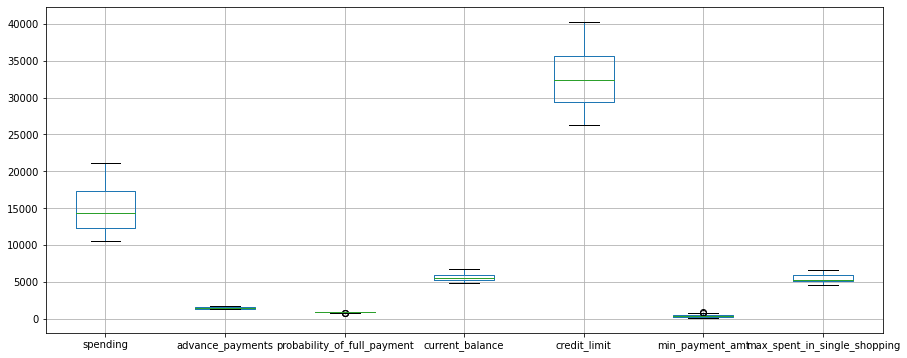

In [14]:
plt.figure(figsize=(15,6))
df.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

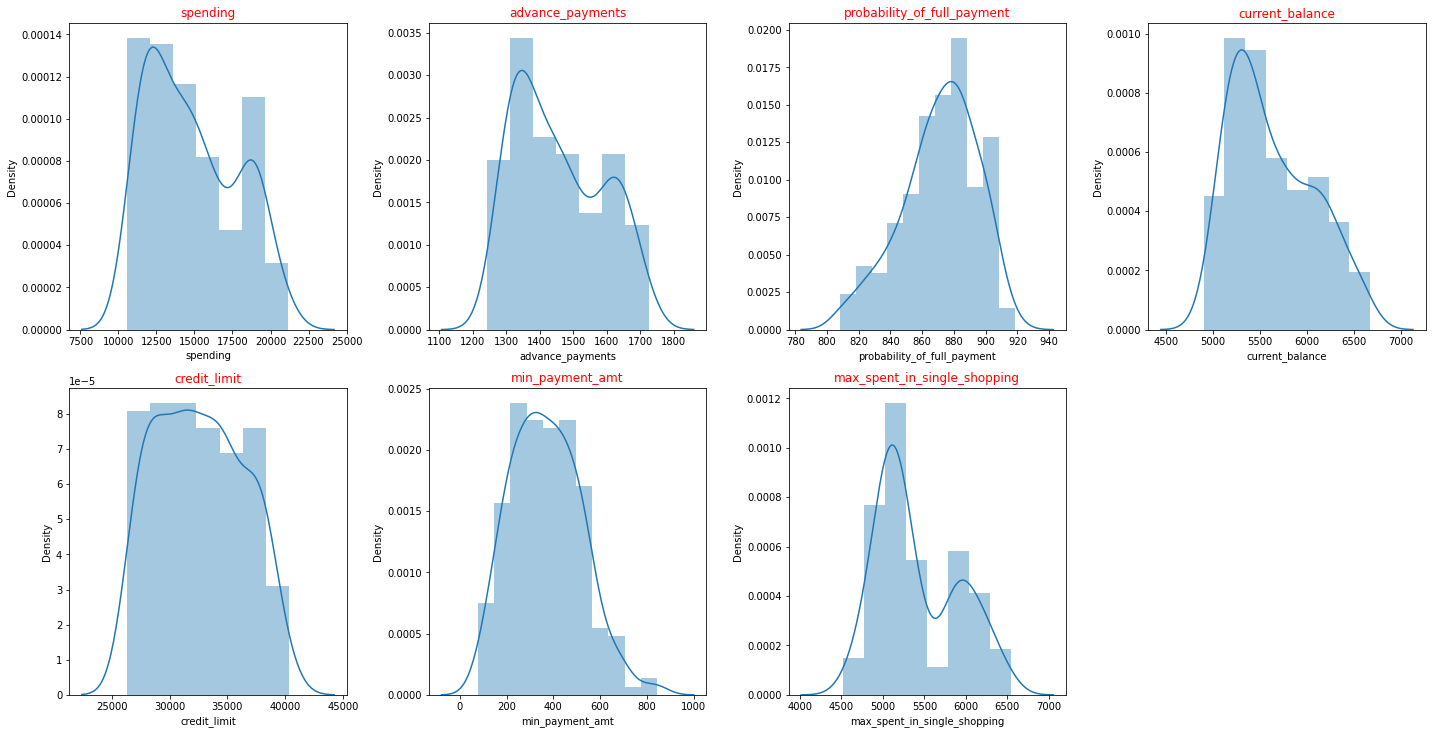

In [15]:
# Distribution Plots 
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


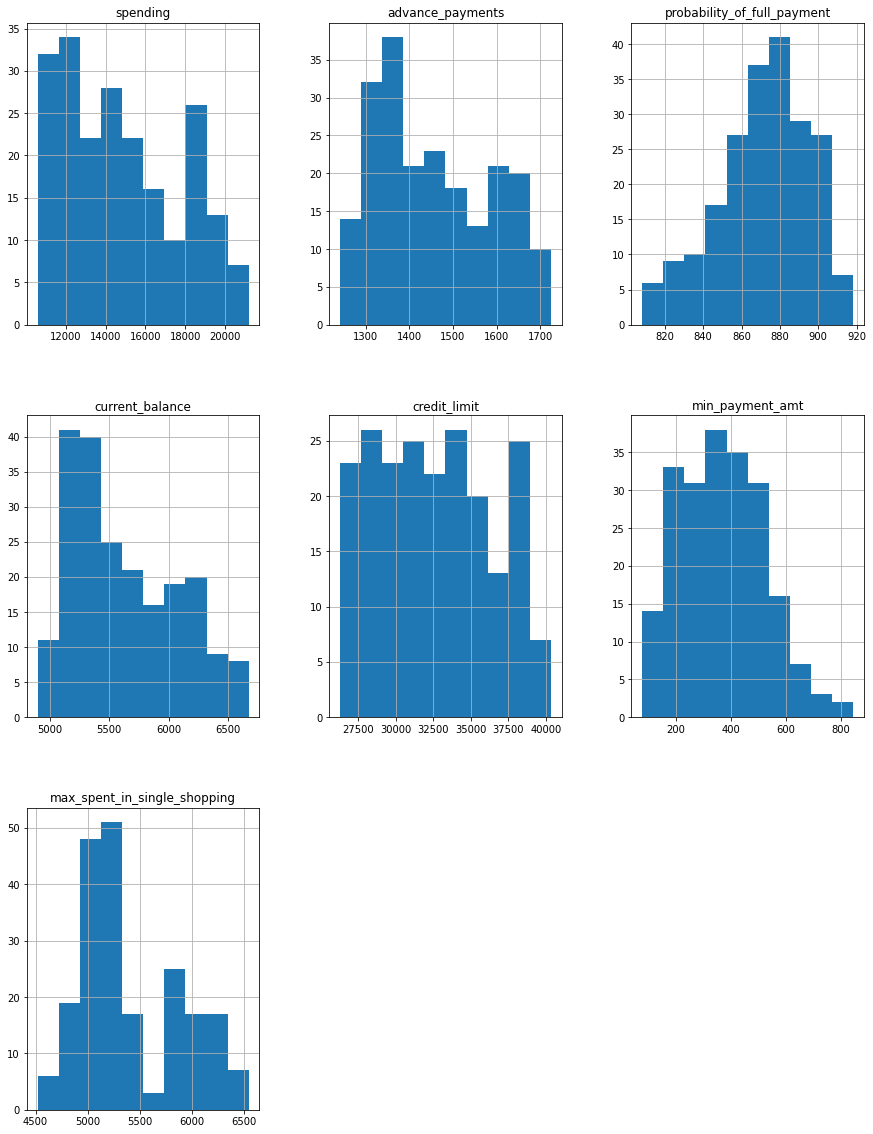

In [16]:
# Distribution Plots using histograms-as all the features in data are continous in nature.
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

Probability of full payment is negatively and max spent in single shopping is positively skewed.
The same is verified as skew output as well.


In [17]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

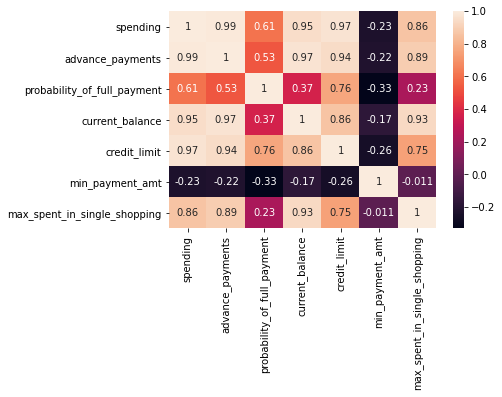

In [18]:
sns.heatmap(df.corr(),annot=True)

Based on the Heatmap we can infer that the spending are highly positively correlated with advance_payment(.99%) ,credit_limit
(.97%),current_balance(.95%),max_spent_in_single_shopping(.86%).
While spending of customer is negatively correleated with min_payment amount.



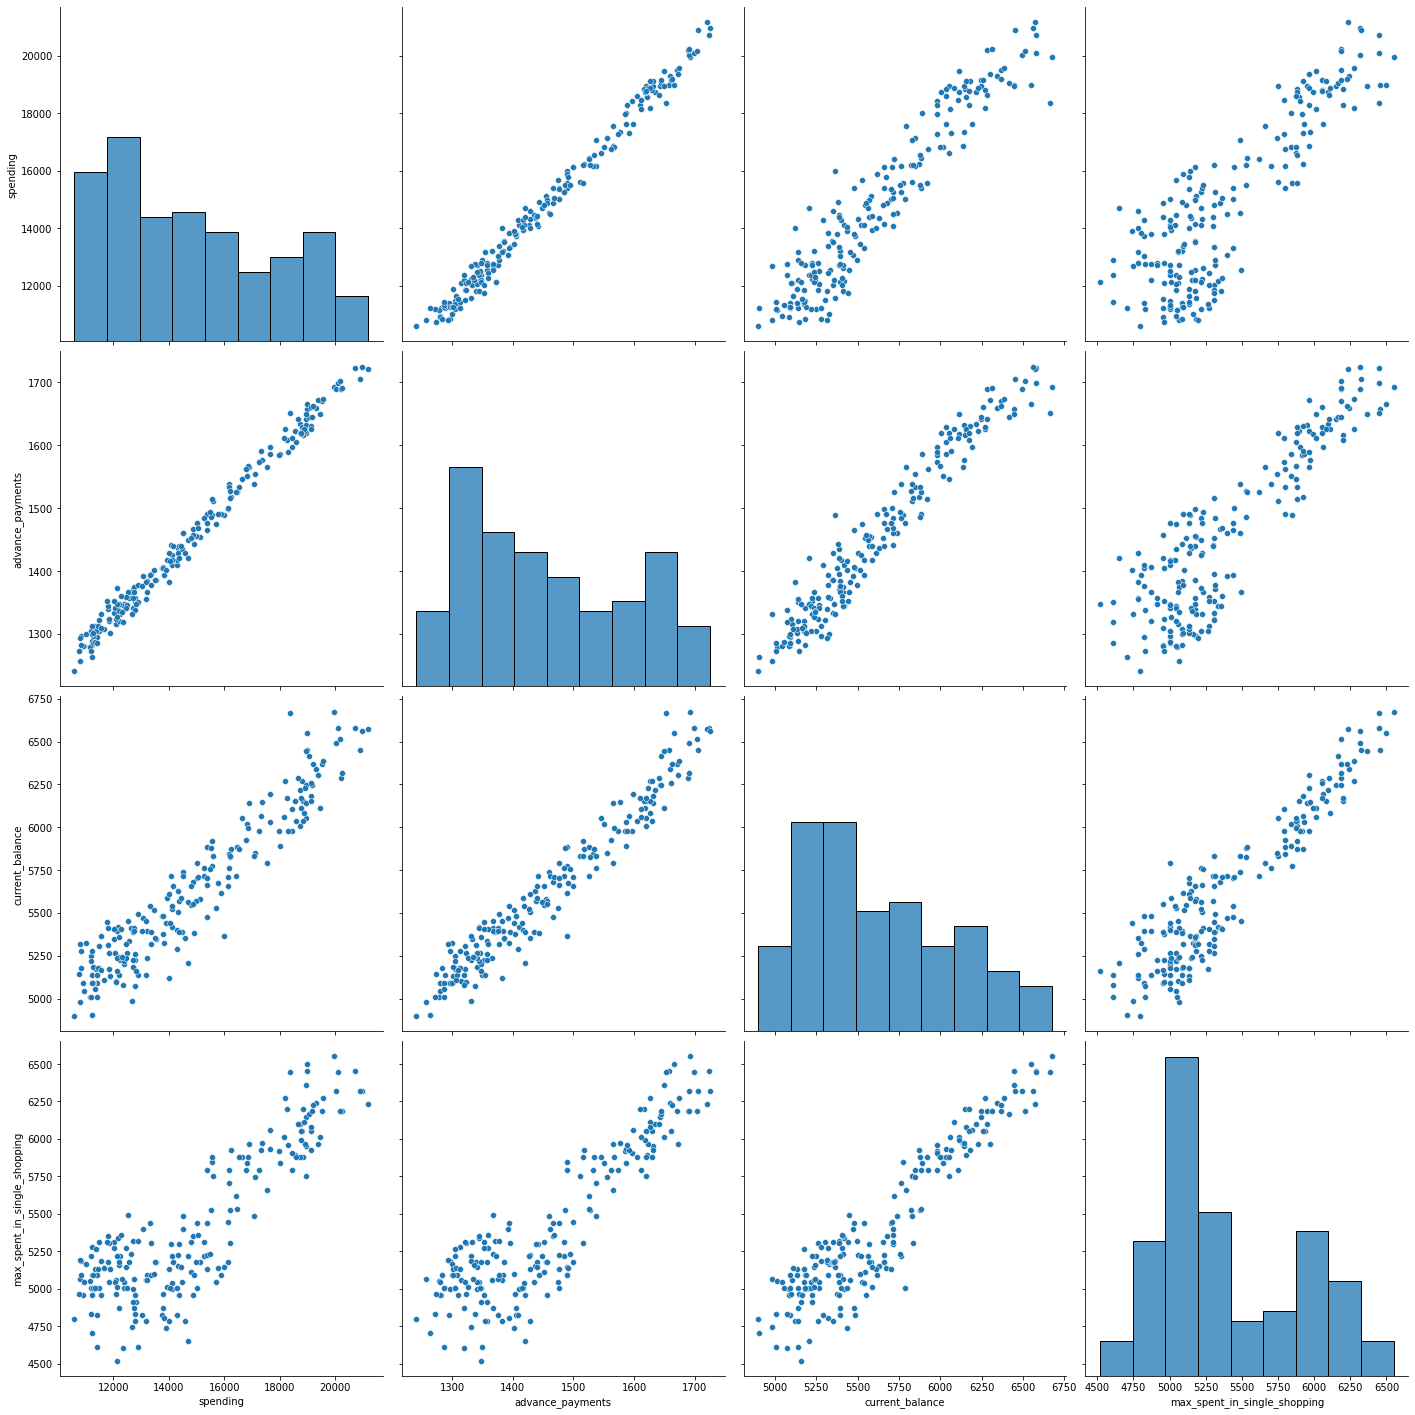

In [19]:
sns.pairplot(df[['spending','advance_payments','current_balance','max_spent_in_single_shopping']],height=5)

Pairplot among the following variables shows a strong relationship in terms of linearity.
Spendings ,advance_payments,current balance and max spent in single shopping.

Checking which features are corrlated with each other and are correlated with outcome variable.

In [20]:
df_corr=df.corr()
df_corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


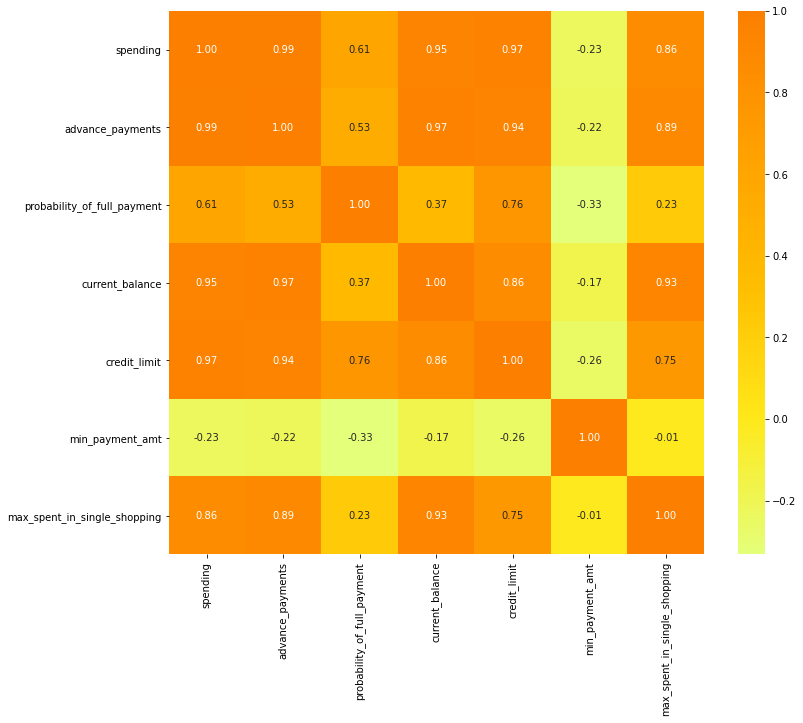

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='Wistia')

Spending w.r.t adavnce payment with strong correlation 0.99
Spending w.r.t current balance with strong correlation 0.95
Spending w.r,t to credit limit with strong correlation 0.97


For any clustering algorithm ,since it is based on weightage and distance based .
For distance measur we should always scale the data using standard scaler .
If we dont scale the cluster will moves towards the feature with high weightage


Scaling the data

Yes ,scaling is required in this data set as all features have different weights and to ensure that none of the features are identified as important only because of the weights scaling is mandatory for this data set.
Standard scaler functionis used to scale the data set.
The scaled data set is converted into dataframe  nad the first five rows are looked at to confirm if the data set has been scaled.
Scaling can be done using either z-score method or standard scaler function from sklearn.



In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Creating an object for the StandardScaler function

X=StandardScaler()

In [24]:
scaled_df = X.fit_transform(df)

In [25]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [26]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

In [27]:
scaled_df.head(6)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274


In [28]:
# Or

from scipy.stats import zscore 
scaled_df = df.apply(zscore)
scaled_df.head(6)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274


From sklearn-prepocesing we import StandardScaler function as function to perform the scaling of dataset. This function uses Z-scaling method to standardise the data.

In [29]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.340198e-16,7.602384e-16,-2.864375e-15,-9.886272e-16,1.799486e-16,8.617445e-17,2.955308e-16
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


Hierarchial clustering is applied to scaled data.Clusters are created between spending and current balance with an consideration that based on spending and current balance available business can identify the customer profiles from segmntation perspective .

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
# Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.

HClust = linkage(scaled_df, method = 'ward')


# Now using the dendrogram to find optimal number of clusters

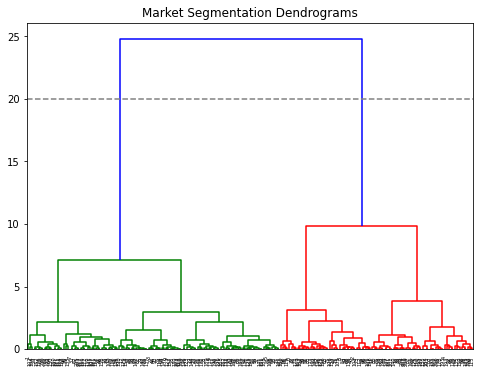

In [32]:
Z=scaled_df.iloc[:,[0,3]].values
plt.figure(figsize=(8,6))
plt.title("Market Segmentation Dendrograms")
dend=dendrogram(linkage(Z,method="ward"))
plt.axhline(20,color='gray',linestyle='--')
plt.show()

In real time ,we are not advisable to go with 2 clusters .
So here the maximum horizontal distance between x and y =20 ,at this there is no merging lines .
Ideally we can consider here 3 clusters.
For any clustering algorithm it is not advisable to go with 2 clusters as we only gets good or bad cluster profiles only .
But in real time scenario,there can be always a medium range customers that can be converted to good .



Since clustering unsupervised learning after using distance matrix and plotting the dendrogram we can see 3 cluster would be optimal cluster

Cutting the Dendrogram with suitable clusters.To get a neater output of dendrogram ,we use Truncate function with the value of P as 10

Truncated dendrogram shows that the best segmentation can be derived from 2 clusters.

##Hierarchial clustering using last -p method.

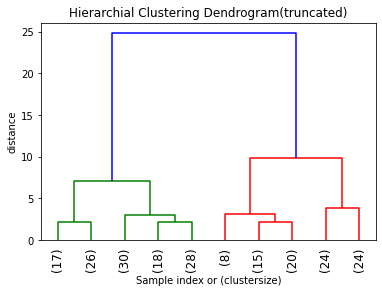

In [33]:
Z=linkage(Z,'ward',metric='euclidean')
plt.title('Hierarchial Clustering Dendrogram(truncated)')
plt.xlabel('Sample index or (clustersize)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,leaf_rotation=90,
    leaf_font_size=12
)
plt.show()

Truncated dendrogram shows that the best segmentation an be derrived from 2 clusters .
However as normally to understand the dataset normally 2 clusters are not preferred because in most of the cases business is already aware about the 2 classes in the data set and hence to generate some more insights ,segmentation with more than 2 clusters is preferred .
As an example for a bank dataser bank would like to know more than good and not so good  customers and hence more insight we are able to generate with more than 2 clusters better it is for the business.
Hence lets consider 3 clusters and plot the clusters to confirm if the derived clusters are providing the required segmentation details.






 Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe

## Using Scipy Fclusters

Importing fcluster module to create clusters

In [34]:
from scipy.cluster.hierarchy import fcluster

[2 1 2 1 3 1 1 1 2 1 2 3 1 2 1 1 3 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 3 1 1 1
 1 1 2 2 1 3 2 1 1 1 2 2 2 1 2 2 2 2 3 1 1 1 2 1 1 1 3 1 2 2 1 2 1 1 1 2 2
 1 2 3 1 3 1 3 1 1 2 1 3 3 3 3 1 1 2 3 1 1 3 2 3 1 3 1 2 1 2 1 2 2 1 1 2 3
 1 2 1 1 3 1 1 1 2 1 1 1 1 1 3 3 1 1 1 1 3 1 2 1 3 2 1 3 1 3 1 1 1 1 1 2 1
 1 1 1 1 1 3 1 1 1 1 3 3 2 1 2 3 2 1 3 3 1 1 3 1 1 2 2 2 1 1 3 1 1 1 1 1 3
 3 1 3 1 1 1 1 1 3 3 3 2 1 2 1 1 3 3 1 3 1 3 1 3 3]


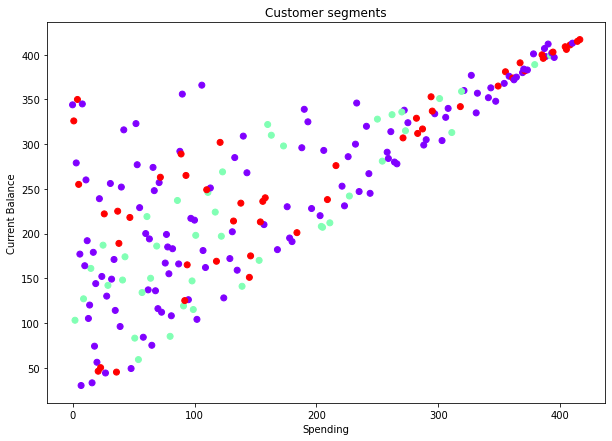

In [35]:

Cluster_fclust=fcluster(Z,3,criterion='maxclust')
print(Cluster_fclust)
plt.figure(figsize=(10,7))
plt.scatter(Z[:,0],Z[:,1],c=Cluster_fclust[1:],cmap='rainbow')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.show()

First f cluster technique was usdto create the clusters.However as we can see from the below plot ,segmenation was not very clear .

Using fclusters we have done a scatter plot between current balance and spending variables w.r.t customer segments.
There are 3 clusters here ,red point corresponds to one cluster ,green point correspond to 2nd clusters and purple points corresponds to third clusters.
Still we can infer anything from this scatter plots.
Thats why we will go for Aglomerative clustering .

Appending clusters to original dataset

##Using Sklearn Agglomerative Clustering class to get better segments

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
# Set n_clusters=3,affinity='euclidean', linkage='ward' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(Z)
print(Cluster_agglo)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 2 1 2 2 0 0 0 2 2 1 1 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In agglomerative we follow bottom to top approach .in agglomerative clustering 0 corresponds to 1 group ,1 corresponds to 2nd group and 2 corresponds to 3rd group.

Text(0, 0.5, 'Current Balance')

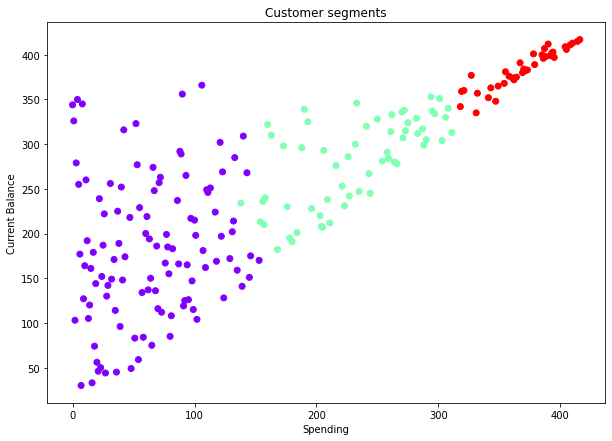

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(Z[:,0],Z[:,1],c=cluster.labels_,cmap='rainbow')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')


Now if we draw a scatter plot between spending and current balance  we are able to see 3 distinct groups as an insights.
Purple are low spending customers ,green are medium spending customers and red are high spending customers with respect to current balance and spendings.

Hence agglomerative technique was used for the given data set .Following is the plot with the clear segmentation of clusters of the data set for the given features.
As uniform groups called as clusters are seen in figure.

Spending and current balance is giving the good customer segmentation.

You can see the data points in the form of three clusters.

Similarly, the customers at top right (blue data points)belong to 1st cluster, these are the customer with highest spending , advance payment and probability of full payment. These are the type of customers that companies should target to increase the business revenue. The customers in the middle (red data points)belongs to cluster 3 are with second highest spending,advance payment and probability of full payment amongs the all three clusters.

The data points in the bottom green dot belong to the cluster 2 the ones with least spending ,advance payment and probability of full payments.

Appending clusters to original dataset

K_MEAN Clustering 

K means is a non hierarchial technique .Here there are two methods to find out optimal clusters 1) Elbow curve method 2)Sihoutte Scores

K--Mean clustering technique was used along with elbow curve to define the optimal clusters forthis dataset.

Once again spending and current vbalance was used to create clusters.
As per the elbow curve method ,3 clusters were identified as an optimal number.

In [48]:
 from sklearn.cluster import KMeans

In [49]:
X=scaled_df.iloc[:,[0,3]].values
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  # Inertia method returns wcss for the model
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


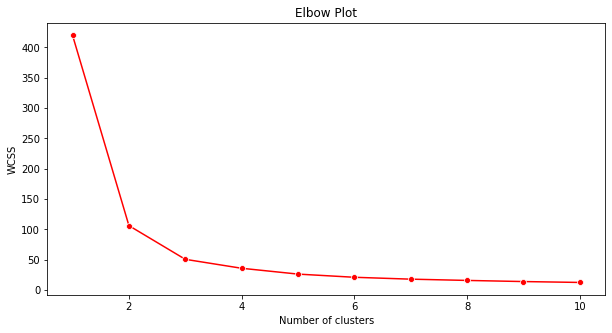

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Within clusters sum of squares drops steeply at 2 point or 3 Points .We need to see the silhoute square to see whether it is 2 or 3 .
As we know in business 2 doesnot makes sense that why we take optimal clusters as 3 .

In [74]:
# Visualising the clusters
# Fitting kmeans to the dat aset with k=3
km3=KMeans(n_clusters=3,init='k-means++',max_iter=300,
           n_init=10,random_state=42)
y_means=km3.fit_predict(X)

Plot of cluster with centroids is as follows:

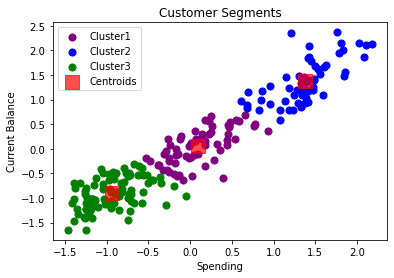

In [75]:

# Visualizing the clusters for K=3
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='Cluster3')

plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],s=200,marker='s',c='red',alpha=0.7,label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.legend()
plt.show()


In [65]:
from sklearn.metrics import silhouette_samples,silhouette_score 

In [69]:
ss={}
for i in range (2,11):
  clusterer=KMeans(n_clusters=i,init='k-means++',random_state=42)
  y=clusterer.fit_predict(X)
  # The higher upto 1 the better
  s= silhouette_score(X,y) 
  ss[i]=round(s,3)
  print('The average silhouette_score for {} clusters is {}'.format(i,s))



The average silhouette_score for 2 clusters is 0.6242504781982778
The average silhouette_score for 3 clusters is 0.5588248642859823
The average silhouette_score for 4 clusters is 0.48508333020633954
The average silhouette_score for 5 clusters is 0.4656505833367352
The average silhouette_score for 6 clusters is 0.41654472470336934
The average silhouette_score for 7 clusters is 0.3979928306140232
The average silhouette_score for 8 clusters is 0.39968291563390257
The average silhouette_score for 9 clusters is 0.3829938009400553
The average silhouette_score for 10 clusters is 0.37612840075490445


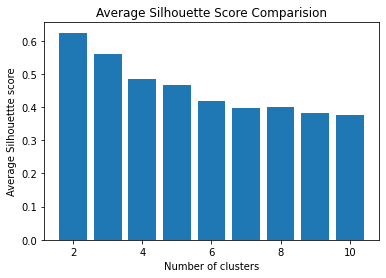

In [70]:
plt.bar(ss.keys(),ss.values())
plt.title('Average Silhouette Score Comparision')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouettte score')
plt.show()

As per the sihouette score ,the optimal number of clusters are 2.
However as mentioned earlier,2 i snot the preffered way of profiling the dataset and hence the ideal number of cluster to be considered is 3 with average silhouette score of 0.5588.


Though the silhoutte score is more for 2 we dont go for 2 clusters we will settle for 3.
That why we have plotted for 3 clusters to get a clear insights.
Here the all the three clusters 1,2 and 3 are clearly distinct.

Additional set of commands to check the cluster with set of all variables.

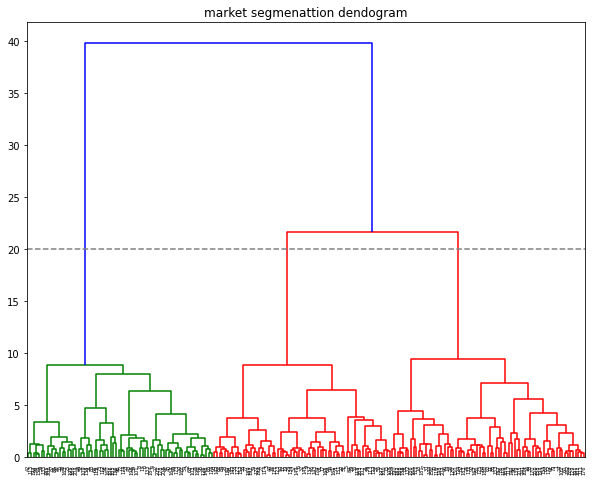

In [73]:
Z1=scaled_df.iloc[:,[0,1,2,3,4,5,6]].values
plt.figure(figsize=(10,8))
plt.title('market segmenattion dendogram')
den=dendrogram(linkage(Z1,method='ward'))
plt.axhline(20,color='gray',linestyle='--')
plt.show()

Here for this data since the data point is very much less so 
hierarchial clustering has provided  a better segmenation,the output obtained from the same is would be used to define the customer strategies.
As per the thumb rule whenever the data volume is more (more than 10000),K-mean clustering works better.
But te Hierrarchial clustering will not perform better.

If we consider all feature with longest horizontal and vertical distance of 20 ,3 clusters are recommended .


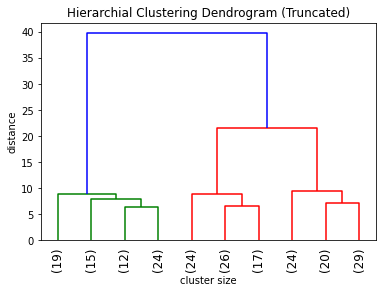

In [77]:
Z2=linkage(Z1,'ward',metric='euclidean')
plt.title('Hierarchial Clustering Dendrogram (Truncated)')
plt.xlabel('cluster size')
plt.ylabel('distance')
dendrogram(
    Z2,truncate_mode='lastp',p=10,leaf_rotation=90,leaf_font_size=12
)
plt.show()

Using the last p method truncated figure will also give the same .

Using Scipy Fclusters

In [79]:
from scipy.cluster.hierarchy import fcluster
Cluster_fclust=fcluster(linkage(Z1,method='ward'),3,criterion='maxclust')
print(Cluster_fclust)


[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


from sklearn.cluster import AgglomerativeClustering

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Cluster=cluster.fit_predict(Z1)
print(Cluster)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


Using fcluster we will club the clusters as 1,2 and 3 .In case of agglomerative clustering it considers 0,1,2.


In [88]:
df['CNO']=Cluster

Add the clusters as a column in our dataset

In [89]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,CNO
0,19940.0,1692.0,875.2,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,906.4,5363.0,35820.0,333.6,5144.0,0
2,18950.0,1642.0,882.9,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,809.9,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,899.2,5890.0,36940.0,206.8,5837.0,1


In [92]:
group1=df[df['CNO']==0]
group2=df[df['CNO']==1]
group3=df[df['CNO']==2]



Here we will grou 0 as group 1 ,1 as group 2 and 2 as group 3.

In [93]:
group1.mean()

spending                        14199.041096
advance_payments                 1423.356164
probability_of_full_payment       879.190411
current_balance                  5478.232877
credit_limit                    32264.520548
min_payment_amt                   261.218082
max_spent_in_single_shopping     5086.178082
CNO                                 0.000000
dtype: float64

In [94]:
group2.mean()

spending                        18371.428571
advance_payments                 1614.542857
probability_of_full_payment       884.400000
current_balance                  6158.171429
credit_limit                    36846.285714
min_payment_amt                   363.915714
max_spent_in_single_shopping     6017.371429
CNO                                 1.000000
dtype: float64

In [95]:
group3.mean()

spending                        11872.388060
advance_payments                 1325.701493
probability_of_full_payment       848.071642
current_balance                  5238.940299
credit_limit                    28485.373134
min_payment_amt                   494.943284
max_spent_in_single_shopping     5122.208955
CNO                                 2.000000
dtype: float64

Here we will find out the group mean with respect to group 1,group 2 and group 3 and find out the highesh and lowest value among the groups.

Defining customer profiles and recommendation for business

In todays competitive world,it is crucial to undersatnd the customer behaviour and categorize customer based on there demography and buying behaviour.
This i sthe critical aspects of csutomer segmentation that allows the marketers to better tilor their marketing efforts to various  audience in terms of promotional ,marketing and product developement strategies.

Based on th eclusters obtained from the hierarchial clustering strategies for different segments of customers are as follows:


Means if we are able to aconvert the middle customer group to top group that itself is profitable .
if we made them top spend from low to high thats a great achievement from business perspective.




Conclusion:

Type 1 Cutsomers -Represented by Purple dots in Hierarchial Clustering Plots:

This is the segment where the spending is not high but there are good number of customers with high current balance .So for these customers reason needs to find out why the available balnce is not utilised.

To start with a survey could be conducted to undrestand if suitable offers /options are not available on ecommerce sites wherein customer has purchased and faced some challenges while using the cards because of which the spending on card is low .



Type II Customer-Represented by Green dots in hierarchial Clustering plots
This is a segment wherein the spending and the current balnce both are moderate.
Further analysis could be performed to understand what could make he segment to move into Red segment .




TypeIII Customer-Represented by Red dots in hierarchial Clustering plots .This is a segment wherein the spending and current balance both are high .

This is probably a high value customer segment for the business and hence special discounting pricings based promotional campaigns for this group to increase their spendigs and use of current balance .

